In [1]:
import pandas as pd

# Load the Parquet file
file_path = 'data/amazon_product_data_preprocessed_text.parquet'
amazon_product_data = pd.read_parquet(file_path)

# Display the first few rows of the dataframe
amazon_product_data.head()

,asin,title,categories,description,brand,main_category,categories_str
0,0000031909,girl ballet tutu neon pink,"[Other Sports, Dance]",high quality 3 layer ballet tutu 12 inch length,unknown,Sports & Outdoors,sport dance
1,0000031852,girl ballet tutu zebra hot pink,"[Other Sports, Dance]",tutu,coxlures,Sports & Outdoors,sport dance
2,0000031887,ballet dressup fairy tutu,"[Girls, Clothing, Active, Active Skirts]",adorable basic ballerina tutu perfect dance re...,boutique cutie,"Clothing, Shoes & Jewelry",girl clothing active active skirt
3,B00D23MC6W,wholesale princess 12quot long ballet tutu 3 l...,"[Other Sports, Dance, Clothing, Girls, Skirts]",adorable fluffy tutu 3 layer tulle elastic wai...,wholesale princess,Sports & Outdoors,sport dance clothing girl skirt
4,0000031895,girl ballet tutu neon blue,"[Other Sports, Dance]",dance tutu girl age 28 year perfect dance prac...,bububibi,Sports & Outdoors,sport dance


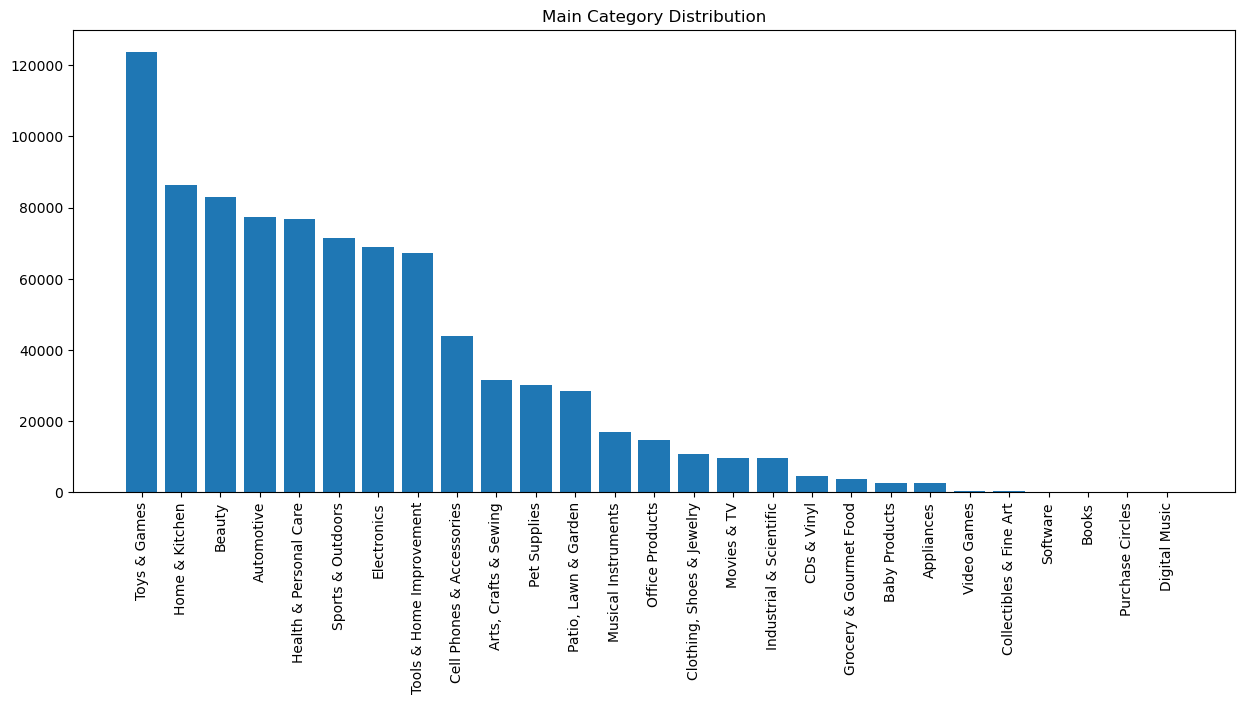

In [3]:
import matplotlib.pyplot as plt

# Get the value counts of the main_category column
value_counts = amazon_product_data['main_category'].value_counts()

# Plot a bar chart of the main categories
plt.figure(figsize=(15, 6))
plt.bar(value_counts.index, value_counts.values)
plt.xticks(rotation=90)
plt.title('Main Category Distribution')
plt.show()

In [4]:
#include only rows from the top 10 main categories
top_categories = value_counts.head(10).index
amazon_product_data_top_categories = amazon_product_data[amazon_product_data['main_category'].isin(top_categories)]
amazon_product_data_top_categories.head()

,asin,title,categories,description,brand,main_category,categories_str
0,0000031909,girl ballet tutu neon pink,"[Other Sports, Dance]",high quality 3 layer ballet tutu 12 inch length,unknown,Sports & Outdoors,sport dance
1,0000031852,girl ballet tutu zebra hot pink,"[Other Sports, Dance]",tutu,coxlures,Sports & Outdoors,sport dance
3,B00D23MC6W,wholesale princess 12quot long ballet tutu 3 l...,"[Other Sports, Dance, Clothing, Girls, Skirts]",adorable fluffy tutu 3 layer tulle elastic wai...,wholesale princess,Sports & Outdoors,sport dance clothing girl skirt
4,0000031895,girl ballet tutu neon blue,"[Other Sports, Dance]",dance tutu girl age 28 year perfect dance prac...,bububibi,Sports & Outdoors,sport dance
6,B006OVZRT8,norpro 1975 gripez grab lift silicone tong,"[Kitchen & Dining, Kitchen Utensils & Gadgets,...",silicone prong waffle utensil fit neatly pocke...,norpro,Home & Kitchen,kitchen dining kitchen utensil gadget cooking ...


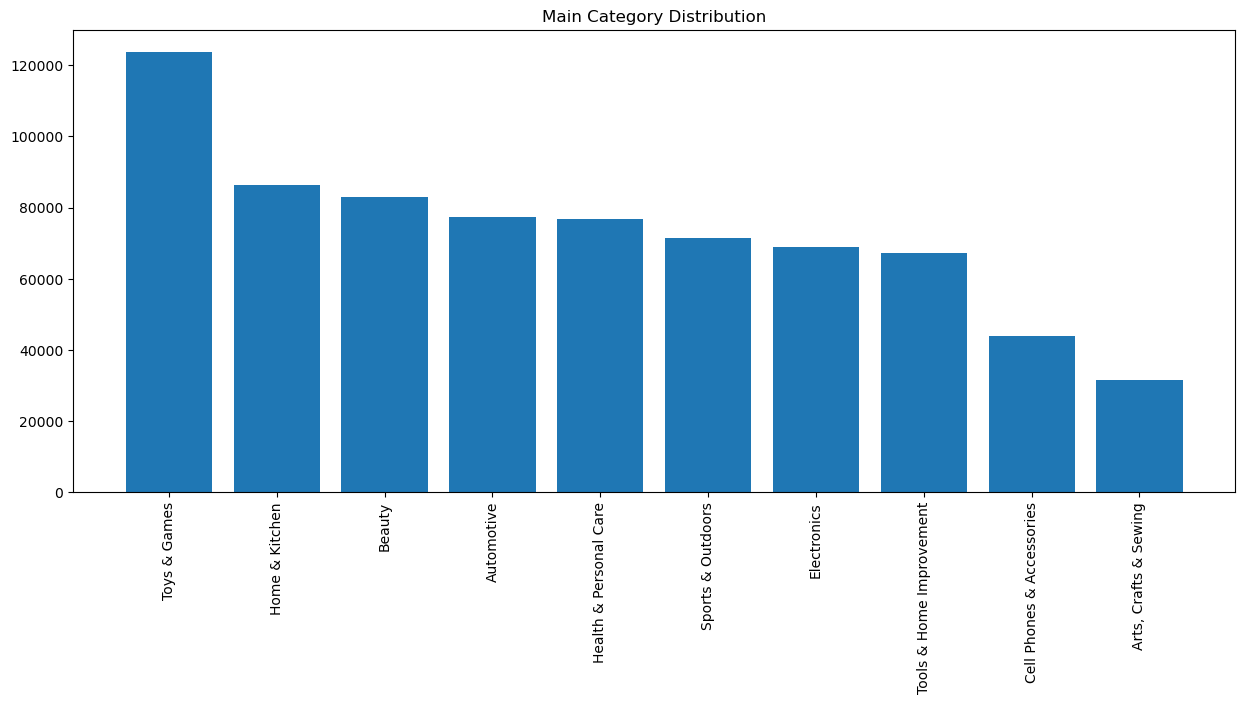

In [5]:
plt.figure(figsize=(15, 6))
plt.bar(amazon_product_data_top_categories['main_category'].value_counts().index, amazon_product_data_top_categories['main_category'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Main Category Distribution')
plt.show()


In [7]:
#load the file amazon_product_edges.parquet and remove the rows where asin in "to" or "from" columns is not in the asin column of the amazon_product_data dataframe
file_path = 'data/amazon_product_edges.parquet'
amazon_product_edges = pd.read_parquet(file_path)

#print length before removing rows
print(len(amazon_product_edges))

# Remove rows where the 'to' column is not in the 'asin' column of the amazon_product_data dataframe
amazon_product_edges = amazon_product_edges[amazon_product_edges['to_asin'].isin(amazon_product_data_top_categories['asin'])]

print(len(amazon_product_edges))

# Remove rows where the 'from' column is not in the 'asin' column of the amazon_product_data dataframe
amazon_product_edges = amazon_product_edges[amazon_product_edges['from_asin'].isin(amazon_product_data_top_categories['asin'])]

# Display the first few rows of the dataframe
print(len(amazon_product_edges))
amazon_product_edges.head()

815222
701930
680548


,from_asin,to_asin
0,B00DNBNLKE,B00D1BJLJG
1,B00DNBNLKE,B00F07K4FY
24,B0060EQERS,B004RT2BQG
25,B0060EQERS,B005MRVBO0
26,B0060EQERS,B0064OK99S


In [7]:
#save the dataframes amazon_product_data_top_categories and amazon_product_edges to parquet files
amazon_product_data_top_categories.to_parquet('data/amazon_product_data_top_categories.parquet')
# amazon_product_edges.to_parquet('data/amazon_product_edges_filtered.parquet')

In [10]:
#for every row in edges, confirm that it is in amazon_product_data_top_categories
edges = amazon_product_edges
data = amazon_product_data_top_categories

# Check if the 'to' column is in the 'asin' column of the amazon_product_data dataframe
edges['to_in_data'] = edges['to_asin'].isin(data['asin'])

# Check if the 'from' column is in the 'asin' column of the amazon_product_data dataframe
edges['from_in_data'] = edges['from_asin'].isin(data['asin'])

# Display the first few rows of the dataframe
edges.head()

# Check if there are any rows where 'to_in_data' is False
print(edges['to_in_data'].value_counts())


to_in_data
True    680548
Name: count, dtype: int64


In [11]:
amazon_product_data_top_categories.head()

,asin,title,categories,description,brand,main_category,categories_str
0,0000031909,girl ballet tutu neon pink,"[Other Sports, Dance]",high quality 3 layer ballet tutu 12 inch length,unknown,Sports & Outdoors,sport dance
1,0000031852,girl ballet tutu zebra hot pink,"[Other Sports, Dance]",tutu,coxlures,Sports & Outdoors,sport dance
3,B00D23MC6W,wholesale princess 12quot long ballet tutu 3 l...,"[Other Sports, Dance, Clothing, Girls, Skirts]",adorable fluffy tutu 3 layer tulle elastic wai...,wholesale princess,Sports & Outdoors,sport dance clothing girl skirt
4,0000031895,girl ballet tutu neon blue,"[Other Sports, Dance]",dance tutu girl age 28 year perfect dance prac...,bububibi,Sports & Outdoors,sport dance
6,B006OVZRT8,norpro 1975 gripez grab lift silicone tong,"[Kitchen & Dining, Kitchen Utensils & Gadgets,...",silicone prong waffle utensil fit neatly pocke...,norpro,Home & Kitchen,kitchen dining kitchen utensil gadget cooking ...


In [ ]:
# create a mapping asin to index in the original dataset
asin_to_index = {asin: amazon_product_data[amazon_product_data['asin'] ==
                                           asin].index[0] for asin in amazon_product_data_top_categories['asin']}

In [ ]:
prit

In [12]:
import pandas as pd
#load the file amazon_product_data_top_categories.parquet
file_path = 'data/amazon_product_data_top_categories.parquet'
amazon_product_data_top_categories = pd.read_parquet(file_path)

#load the file amazon_product_edges_filtered.parquet
file_path = 'data/amazon_product_edges_filtered.parquet'
amazon_product_edges = pd.read_parquet(file_path)

#for every row in edges, confirm that it is in amazon_product_data_top_categories
edges = amazon_product_edges
data = amazon_product_data_top_categories

# Check if the 'to' column is in the 'asin' column of the amazon_product_data dataframe
edges['to_in_data'] = edges['to_asin'].isin(data['asin'])

# Check if the 'from' column is in the 'asin' column of the amazon_product_data dataframe
edges['from_in_data'] = edges['from_asin'].isin(data['asin'])

# Display the first few rows of the dataframe
edges.head()

# Check if there are any rows where 'to_in_data' is False
print(edges['to_in_data'].value_counts())

to_in_data
True    680548
Name: count, dtype: int64


In [13]:
print(data.shape)

(729819, 7)
